# ------------------------STATISTICS--------------------------



# HYPOTHESIS TESTING EXERCISES

Do your work for this exercise in a jupyter notebook named hypothesis_testing.ipynb.

For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), then give an example of what a true positive, true negative, type I and type II errors would look like. Note that some of the questions are intentionally phrased in a vague way. It is your job to reword these as more precise questions that could be tested.


## 1). Has the network latency gone up since we switched internet service providers?


Ho (Null Hypothesis): Network latency has gone up begining on date internet service providers (ISP) were switched. 
    
H1 (Alternate Hypothesis): Network latency has not gone up begining on date internet service providers were switched.
    
True +ve: Accepting the Ho as expected since data inference sugest the network laterncy has gone up due to switching ISP. 
    
True -ve: We accept Ho but the cause for network latency was not attributed to the switching of ISP. Could be the weather, distance from the tower, a new service plan, e.t.c. that coincided with the switching of ISP.

Type I Error (False +ve): Reject Ho that network laterncy has not gone up (adapt H1) yet there is evidence inferred from data that this is not true. Swithching providers did not make network latency rise. 

Type II Error (False -ve): Failed to reject Ho above yet inference from statistical data suggest we should reject Ho and adapt H1 



## 2). Is the website redesign any good?

Good cannot be measured statistically. It has to be converted to 


Ho (Null Hypothesis): Website redesign has resulted in higher sales return 
    
H1 (Alternate Hypothesis): Website redesign did not affect sales return
    
True +ve: Accept Ho as inferred by statistical data
    
True -ve: Accept Ho but the cause os sales increase was not necessarily caused by the re-design.
    
Type I Error (False +ve): Rejected Ho above when inferred data sugest we should have kept the hypothesis 
    
Type II Error (False -ve): Did not reject Ho yet we should have. Website redesign did not affect sales return
    


## 3). Is our television ad driving more sales?


Ho (Null Hypothesis): Listing our ad on television has resulted in increased sales.
    
H1 (Alternate Hypothesis): Listing our ad on television did not result in increased sales.
    
True +ve: Increased sales was directlty as a result in increased sales. Accept Ho
    
True -ve: Increased sales was as a result of listing our tv ad. Other factors caused the spike in sales
    
Type I Error (False +ve): Adapted H1 
    
Type II Error (False -ve): (Did not reject Ho, though should have)

# T-TEST EXERCISES

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns


import numpy as np
import pandas as pd

from scipy import stats
from pydataset import data

import env



# Exercise #1

Ace Realty wants to determine whether the average time it takes to sell homes is different for 
its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard 
deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a 
standard deviation of 20 days. Use a .05 level of significance.


Ho: Office #1 average time to sell a home = average time to sell a home

H1: Office #1 average time to sell a home != average time to sell a home


In [158]:
alpha = 0.05

mean_office_one = 90
std_office_one = 15
sales_office_one = 40

mean_office_two = 100 
std_office_two = 20
sales_office_two = 50

office_one = np.random.normal(mean_office_one, std_office_one, sales_office_one)

office_two = np.random.normal(mean_office_two, std_office_two, sales_office_two)


# print("Office One Varriance: ", office_one.var(), "\nOffice Two Varriance: ", office_two.var())

t, p = stats.ttest_ind(office_one, office_two, equal_var = False)

t, p/ 2


(-1.9420558076998378, 0.027671130804336405)

In [185]:
# Decision:

print("This is a comparison of mean average time to sell a home by Ace Reator with two office locations")
print()
print("_______________________________________________________________________________________________")
print("Hypothesis testing of two sample mean with two tails")
print()
print("Determine: \n\n\t is P / 2:- ", (p / 2) < alpha)
print("\t t > 0:- ", t > 0)

print()
print("--------------------------Answer Begin-----------------------------")
print()
# Hypothesis Logic

Ho = "Office #1 average time to sell a home = average time to sell a home"

H1 = "Office #1 average time to sell a home != average time to sell a home"

if(p / 2) > alpha:
    
    print(f"FAILED TO REJECT Ho: (Adapted Hypothesis)-> {Ho}")
    
elif t < 0:
    
    print(f"FAILED TO REJECT Ho: (Adapted Hypothesis)-> {Ho}")
    
else:
    
    print("REJECT Ho")
    
print()

print("--------------------------Answer End-----------------------------")


This is a comparison of mean average time to sell a home by Ace Reator with two office locations

_______________________________________________________________________________________________
Hypothesis testing of two sample mean with two tails

Determine: 

	 is P / 2:-  True
	 t > 0:-  False

--------------------------Answer Begin-----------------------------

FAILED TO REJECT Ho: (Adapted Hypothesis)-> Office #1 average time to sell a home = average time to sell a home

--------------------------Answer End-----------------------------


# Exercise #2
Load the mpg dataset and use it to answer the following questions:

 -> Is there a difference in fuel-efficiency in cars from 2008 vs 1999?

 -> Are compact cars more fuel-efficient than the average car?
    
 -> Do manual cars get better gas mileage than automatic cars?


In [233]:
mpg = data('mpg')
mpg


,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


In [234]:
mpg["average_mpg"] = ((mpg["cty"] + mpg["hwy"]) / 2)
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,average_mpg
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,23.5
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,25.0
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,21.0
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,22.0


In [235]:
mpg = pd.DataFrame(mpg)

mpg.year.value_counts()


1999    117
2008    117
Name: year, dtype: int64

## A). -> Is there a difference in fuel-efficiency in cars from 2008 vs 1999?


HYPOTHESIS: 
H0: Cars manufactured in 2008 have higher fuel efficiency than cars manufactured in 1999

H1: Cars manufactured in 2008 have lower fuel efficiency than cars manufactured in 1999

In [424]:
mpg_model_08 = mpg[mpg.year == 2008].average_mpg
mpg_model_99 = mpg[mpg.year == 1999].average_mpg

mpg_model_08.head(), mpg_model_99.head()


(3     25.5
 4     25.5
 7     22.5
 10    24.0
 11    23.0
 Name: average_mpg, dtype: float64,
 1    23.5
 2    25.0
 5    21.0
 6    22.0
 8    22.0
 Name: average_mpg, dtype: float64)

In [266]:
print("2008 Var: ",mpg_model_08.var())
print("1999 Var: ", mpg_model_99.var())


2008 Var:  24.097480106100797
1999 Var:  27.122605363984682


In [267]:
t, pval = stats.ttest_ind(mpg_model_08, mpg_model_99, equal_var = False)
t, pval

(-0.21960177245940962, 0.8263750772060638)

In [378]:
# Decision:

print("Average MPG 2008 vs 1999")
print()
print("____________________________________")
print("Hypothesis testing of two sample mean with two tails")
print()
print("Determine: \n\n\t is P / 2:- ", (pval / 2) < alpha)
print("\t t > 0:- ", t > 0)

print()
print("--------------------------Answer Begin-----------------------------")
print()
# Hypothesis Logic

Ho = "Cars manufactured in 2008 have higher fuel efficiency than cars manufactured in 1999"

H1 = "Cars manufactured in 2008 have lower fuel efficiency than cars manufactured in 1999"

if(pval / 2) > alpha:
    
    print(f"FAILED TO REJECT Ho: (Adapted Hypothesis)-> {Ho}")
    
elif t < 0:
    
    print(f"FAILED TO REJECT Ho: (Adapted Hypothesis)-> {Ho}")
    
else:
    
    print("REJECT Ho")
    
print()

print("--------------------------Answer End-----------------------------")

Average MPG 2008 vs 1999

____________________________________
Hypothesis testing of two sample mean with two tails

Determine: 

	 is P / 2:-  True
	 t > 0:-  True

--------------------------Answer Begin-----------------------------

REJECT Ho

--------------------------Answer End-----------------------------


<AxesSubplot:>

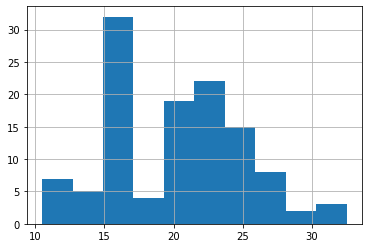

In [379]:
# 2008 mpg_model

mpg_model_08.hist()

<AxesSubplot:>

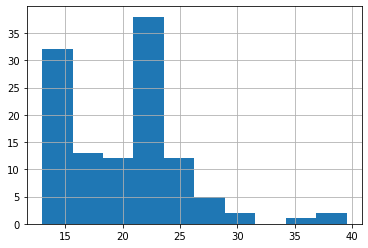

In [380]:
# 1999 mpg_model

mpg_model_99.hist()

## B). -> Are compact cars more fuel-efficient than the average car?

H0: Compact cars average fuel efficiency = average fuel efficiency in non-compact cars

H1: Compact cars average fuel efficiency != average fuel efficiency in non-compact cars



In [275]:
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,average_mpg
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,23.5
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,25.0
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,21.0
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,22.0


In [285]:
# Rename class to class_type

mpg = mpg.rename(columns={"class":"class_type"})
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class_type,average_mpg
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,23.5
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,25.0
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,21.0
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,22.0


In [425]:
compact_cars_fuel_efficiency = mpg[mpg.class_type == 'compact'].average_mpg

non_compact_cars_fuel_efficiency = mpg[mpg.class_type != 'compact'].average_mpg

print(compact_cars_fuel_efficiency.head(),non_compact_cars_fuel_efficiency.head())

1    23.5
2    25.0
3    25.5
4    25.5
5    21.0
Name: average_mpg, dtype: float64 16    19.5
17    21.0
18    19.5
19    17.0
20    13.0
Name: average_mpg, dtype: float64


In [294]:
# Check variance

print("Compact cars var: ", compact_cars_fuel_efficiency.var())
print("Non Compact cars var: ", non_compact_cars_fuel_efficiency.var())


Compact cars var:  12.442876965772433
Non Compact cars var:  23.652794548904602


In [299]:
# Using two sample t-tes

t_compact, pval_compact = stats.ttest_ind(compact_cars_fuel_efficiency, 
                                          non_compact_cars_fuel_efficiency, 
                                          equal_var = False)

t_compact, pval_compact

(8.128810422808078, 1.6018060656123074e-12)

In [375]:
# Decision:

print("Average MPG Compact cars vs Non-compact cars")
print()
print("____________________________________")
print("Hypothesis testing of two sample mean with two tails")
print()
print("Determine: \n\n\t is P / 2:- ", (pval_compact / 2) < alpha)
print("\t t > 0:- ", t_compact > 0)

print()
print("--------------------------Answer Begin-----------------------------")
print()
# Hypothesis Logic

Ho = "Compact cars average fuel efficiency = average fuel efficiency in non-compact cars"

H1 = "Compact cars average fuel efficiency != average fuel efficiency in non-compact cars"

if(pval_compact / 2) > alpha:
    
    print(f"FAILED TO REJECT Ho: (Adapted Hypothesis)-> {Ho}")
    
elif t_compact < 0:
    
    print(f"FAILED TO REJECT Ho: (Adapted Hypothesis)-> {Ho}")
    
else:
    
    print("REJECT Ho & adapt H1")
    
print()

print("--------------------------Answer End-----------------------------")

Average MPG Compact cars vs Non-compact cars

____________________________________
Hypothesis testing of two sample mean with two tails

Determine: 

	 is P / 2:-  True
	 t > 0:-  True

--------------------------Answer Begin-----------------------------

REJECT Ho & adapt H1

--------------------------Answer End-----------------------------


<AxesSubplot:>

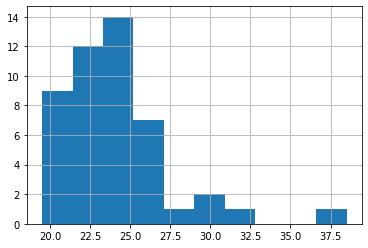

In [376]:
# Compact_cars_fuel_efficiency
compact_cars_fuel_efficiency.hist()

<AxesSubplot:>

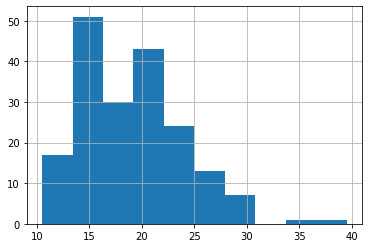

In [377]:
# Compact_cars_fuel_efficiency

non_compact_cars_fuel_efficiency.hist()

## C). -> Do manual cars get better gas mileage than automatic cars?

H0: Manual car average gas mileage = average gas mileage for automatic cars
H1: Manual car average gas mileage != average gas mileage for automatic cars


In [304]:
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class_type,average_mpg
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,23.5
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,25.0
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,21.0
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,22.0


In [327]:
mpg.trans.value_counts()

auto(l4)      83
manual(m5)    58
auto(l5)      39
manual(m6)    19
auto(s6)      16
auto(l6)       6
auto(av)       5
auto(s5)       3
auto(s4)       3
auto(l3)       2
Name: trans, dtype: int64

In [427]:
def avg_mpg_manual_cars():
    
    manual_cars = []
    
    avg_manual_m6 = mpg[mpg.trans == 'manual(m6)'].average_mpg
    avg_manual_m5 = mpg[mpg.trans == 'manual(m5)'].average_mpg
    
    manuals = [avg_manual_m6, avg_manual_m5]
    
    return pd.concat(manuals)

avg_mpg_manual_cars()

def avg_mpg_automatic_cars():
    
    automatic_cars = []
    
    avg_automatic_15 = mpg[mpg.trans == 'auto(15)'].average_mpg
    avg_automatic_s6 = mpg[mpg.trans == 'auto(s6)'].average_mpg
    avg_automatic_16 = mpg[mpg.trans == 'auto(16)'].average_mpg
    avg_automatic_av = mpg[mpg.trans == 'auto(av)'].average_mpg
    avg_automatic_s5 = mpg[mpg.trans == 'auto(s5)'].average_mpg
    avg_automatic_s4 = mpg[mpg.trans == 'auto(s4)'].average_mpg
    avg_automatic_13 = mpg[mpg.trans == 'auto(13)'].average_mpg

    avg_mpg_automatic_cars = [avg_automatic_15, avg_automatic_s6, avg_automatic_16, 
                      avg_automatic_av, avg_automatic_s5, avg_automatic_s4, 
                      avg_automatic_13]
    
    return pd.concat(avg_mpg_automatic_cars)

# avg_mpg_manual_cars()
# avg_mpg_automatic_cars()

In [429]:
avg_mpg_manual_cars().head()

3     25.5
10    24.0
15    20.0
24    21.0
26    21.0
Name: average_mpg, dtype: float64

In [428]:
avg_mpg_automatic_cars().head()

11    23.0
14    21.0
17    21.0
18    19.5
27    20.0
Name: average_mpg, dtype: float64

In [362]:
# Var Manual Cars
manual_cars().var()

26.635167464114833

In [364]:
# Var Automatic Cars
automatic_cars().var()

11.915242165242164

In [369]:
t_man_auto, p_man_auto = stats.ttest_ind(manual_cars(), automatic_cars(), equal_var = False)
t_man_auto, p_man_auto

(0.4022557985499306, 0.6887507424704394)

In [371]:
# Decision:

print("Average MPG Manual cars vs Automatic cars")
print()
print("____________________________________")
print("Hypothesis testing of two sample mean with two tails")
print()
print("Determine: \n\n\t is P / 2:- ", (p_man_auto / 2) < alpha)
print("\t t > 0:- ", t_man_auto > 0)

print()
print("--------------------------Answer Begin-----------------------------")
print()
# Hypothesis Logic

H0 = "Manual car average gas mileage = average gas mileage for automatic cars"

H1 = "Manual car average gas mileage != average gas mileage for automatic cars"

if(p_man_auto / 2) > alpha:
    
    print(f"FAILED TO REJECT Ho: (Adapted Hypothesis)-> {H0}")
    
elif t_man_auto < 0:
    
    print(f"FAILED TO REJECT Ho: (Adapted Hypothesis)-> {H0}")
    
else:
    
    print("REJECT Ho & adapt H1")
    
print()

print("--------------------------Answer End-----------------------------")

Average MPG Manual cars vs Automatic cars

____________________________________
Hypothesis testing of two sample mean with two tails

Determine: 

	 is P / 2:-  False
	 t > 0:-  True

--------------------------Answer Begin-----------------------------

FAILED TO REJECT Ho: (Adapted Hypothesis)-> Manual car average gas mileage = average gas mileage for automatic cars

--------------------------Answer End-----------------------------


<AxesSubplot:>

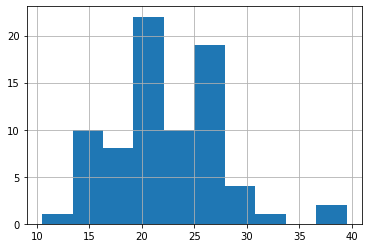

In [373]:
# Manual Cars

manual_cars().hist()

<AxesSubplot:>

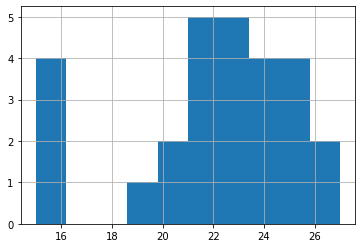

In [433]:
# Automatic_cars

automatic_cars().hist()

# CORRELATIONS EXERCISES

1). Use the telco_churn data. 

    -> Does tenure correlate with monthly charges? 
    
    -> Total charges? 
    
    -> What happens if you control for phone and internet service?

    
2). Use the employees database.

    -> Is there a relationship between how long an employee has been with the company and 
    their salary?

    -> Is there a relationship between how long an employee has been with the company and 
    the number of titles they have had?
    
    
3). Use the sleepstudy data. Is there a relationship between days and reaction time?

In [40]:
# DB Connections (Telco_Churn)

db_url = f'mysql+pymysql://{env.user}:{env.password}@{env.host}/telco_churn'
df = pd.read_sql('SELECT * FROM customers', db_url)

df_telco = pd.DataFrame(df)

df_telco.head()


,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,device_protection,tech_support,streaming_tv,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,1,No,...,No,Yes,Yes,No,2,Yes,2,65.6,593.3,No
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,1,No,...,No,No,No,Yes,1,No,2,59.9,542.4,No
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,2,No,...,Yes,No,No,No,1,Yes,1,73.9,280.85,Yes
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,2,No,...,Yes,No,Yes,Yes,1,Yes,1,98.0,1237.85,Yes
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,2,No,...,No,Yes,Yes,No,1,Yes,2,83.9,267.4,Yes


In [5]:
df_telco["total_charges"].tail()

7038      742.9
7039     1873.7
7040      92.75
7041    4627.65
7042     3707.6
Name: total_charges, dtype: object

In [12]:
# # Fill Total Charges NULLS with Zeros

# df_telco["total_charges"] = df_telco["total_charges"]
# df_telco = df_telco.total_charges.fillna(0)
# df_telco = df_telco.monthly_charges.fillna(0)

In [20]:
r, p = stats.pearsonr(df_telco.tenure, df_telco.monthly_charges)
r, p

(0.24789985628615008, 4.0940449915016345e-99)

In [24]:
# r_telco_month_charges, _ = stats.pearsonr(df_telco.tenure, df_telco.monthly_charges)
# r_telco_total_charges, _ = stats.pearsonr(df_telco.tenure, df_telco.total_charges)
# r_telco_month_charges, r_telco_total_charges

##    1a).  Does tenure correlate with monthly charges? 


Text(0.5, 1.0, 'Tenure vs Monthly Charges')

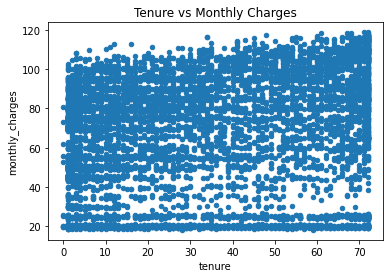

In [14]:
# ANSWER: No Correlation

df_telco.plot.scatter('tenure', 'monthly_charges')

plt.title('Tenure vs Monthly Charges')


##   1b). Correlation of Tenure vs Total charges? 


In [27]:




employees_salary_table = employees_salary_table..replace()
# ANSWER:

# r , p = stats.pearsonr(df_telco.tenure, df_telco.total_charges)
# r, p

Text(0.5, 1.0, 'Tenure vs Total Charges')

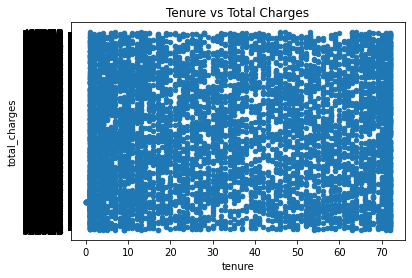

In [28]:
df_telco.plot.scatter('tenure', 'total_charges')
plt.title('Tenure vs Total Charges')


In [31]:
df_telco.head()


,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,device_protection,tech_support,streaming_tv,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,1,No,...,No,Yes,Yes,No,2,Yes,2,65.6,593.3,No
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,1,No,...,No,No,No,Yes,1,No,2,59.9,542.4,No
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,2,No,...,Yes,No,No,No,1,Yes,1,73.9,280.85,Yes
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,2,No,...,Yes,No,Yes,Yes,1,Yes,1,98.0,1237.85,Yes
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,2,No,...,No,Yes,Yes,No,1,Yes,2,83.9,267.4,Yes


##    1c). What happens if you control for phone and internet service?


In [43]:
# PHONE SERVICE

phone_tenure = df_telco[df_telco.phone_service == 'Yes'].tenure
phone_monthly_charge = df_telco[df_telco.phone_service == 'Yes'].monthly_charges

r, p = stats.pearsonr(phone_tenure, phone_monthly_charge)

r, p

(0.24538898585362875, 7.117871077967264e-88)

/usr/local/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


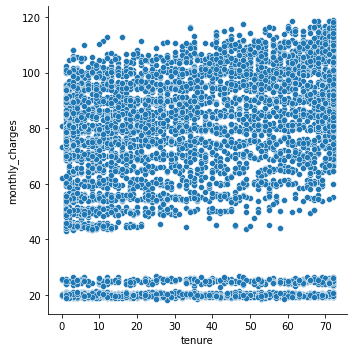

In [44]:
sns.relplot(phone_tenure, phone_monthly_charge)

In [46]:
# INTERNET SERVICE

internet_tenure = df_telco[df_telco.internet_service_type_id != 0].tenure
internet_monthly_charge = df_telco[df_telco.internet_service_type_id != 0].monthly_charges

r, p = stats.pearsonr(internet_tenure, internet_monthly_charge)

r, p



(0.24789985628615008, 4.0940449915016345e-99)

/usr/local/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


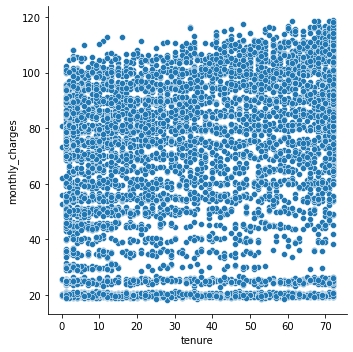

In [48]:
sns.relplot(internet_tenure, internet_monthly_charge)

## 2a).  Is there a relationship between how long an employee has been with the company and their salary?

In [2]:
# DB Connection (Employees)

db_url = f'mysql+pymysql://{env.user}:{env.password}@{env.host}/employees'
df_employees = pd.read_sql('SELECT * FROM employees', db_url)
df_salaries = pd.read_sql('SELECT * FROM salaries', db_url)

# Convert DB data into Pandas DF
df_employees = pd.DataFrame(df_employees)
df_salaries = pd.DataFrame(df_salaries)

employees_with_salary = [df_employees, df_salaries]
employees_salary_table = pd.concat(employees_with_salary, axis=1)
employees_salary_table

,emp_no,birth_date,first_name,last_name,gender,hire_date,emp_no,salary,from_date,to_date
0,10001.0,1953-09-02,Georgi,Facello,M,1986-06-26,10001,60117,1986-06-26,1987-06-26
1,10002.0,1964-06-02,Bezalel,Simmel,F,1985-11-21,10001,62102,1987-06-26,1988-06-25
2,10003.0,1959-12-03,Parto,Bamford,M,1986-08-28,10001,66074,1988-06-25,1989-06-25
3,10004.0,1954-05-01,Chirstian,Koblick,M,1986-12-01,10001,66596,1989-06-25,1990-06-25
4,10005.0,1955-01-21,Kyoichi,Maliniak,M,1989-09-12,10001,66961,1990-06-25,1991-06-25
...,...,...,...,...,...,...,...,...,...,...
2844042,NaN,NaN,NaN,NaN,NaN,NaN,499999,63707,1997-11-30,1998-11-30
2844043,NaN,NaN,NaN,NaN,NaN,NaN,499999,67043,1998-11-30,1999-11-30
2844044,NaN,NaN,NaN,NaN,NaN,NaN,499999,70745,1999-11-30,2000-11-29
2844045,NaN,NaN,NaN,NaN,NaN,NaN,499999,74327,2000-11-29,2001-11-29


In [24]:
employees_salary_table.head()

0    1986-06-26
1    1985-11-21
2    1986-08-28
3    1986-12-01
4    1989-09-12
Name: hire_date, dtype: object

In [5]:
employees_salary_table.emp_no

,emp_no,emp_no
0,10001.0,10001
1,10002.0,10001
2,10003.0,10001
3,10004.0,10001
4,10005.0,10001
...,...,...
2844042,NaN,499999
2844043,NaN,499999
2844044,NaN,499999
2844045,NaN,499999


In [7]:
# stats.pearsonr(employees_salary_table.tenure, employees_salary_table.monthly_charges)

AttributeError: 'DataFrame' object has no attribute 'tenure'

In [20]:


# Fill NaNs with zeros on all columns
# df_telco = df_telco.total_charges.fillna(0)
# employees_salary_table = employees_salary_table.hire_date.fillna(0000-00-00)
# employees_salary_table.head()




employees_salary_table = employees_salary_table.hire_date.replace(np.NaN, '0000-00-00', regex = True)
# employees_salary_table

In [ ]:
# # Convert ZEROS dates to format 0000-00-00
# employees_salary_table = employees_salary_table.hire_date.fillna(0000-00-00)

# # df_telco = df_telco.total_charges.fillna(0)


# employee_time_with_company = employees_salary_table[employees_salary_table.to_date - employees_salary_table.hire_date ]
# employee_time_with_company


3). Use the sleepstudy data. Is there a relationship between days and reaction time?


In [22]:
sleep = data('sleepstudy')
sleep

,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308
...,...,...,...
176,329.6076,5,372
177,334.4818,6,372
178,343.2199,7,372
179,369.1417,8,372


In [24]:
r, p = stats.pearsonr(sleep.Days, sleep.Reaction)

r, p

(0.5352302262650253, 9.894096322214812e-15)

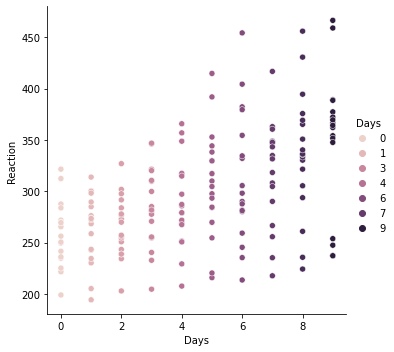

In [33]:
sns.relplot(data = sleep, y="Reaction", x="Days", hue="Days" )

In [36]:
alpha = 0.05

if p < alpha:
    
    print('Reject Ho:')
    
else:
    
    print('Failed to reject Ho')

Reject Ho:


# CHI Square Exercises

1). Use the following contingency table to help answer the question of whether using a macbook and being a codeup student are independent of each other.

 	Codeup Student	Not Codeup Student
Uses a Macbook	49	20
Doesn't Use A Macbook	1	30


2). Choose another 2 categorical variables from the mpg dataset and perform a 
chi2 contingency table test with them. Be sure to state your null and alternative hypotheses.


3). Use the data from the employees database to answer these questions:

    -> Is an employee's gender independent of whether an employee works in sales or marketing? 
(only look at current employees)

    -> Is an employee's gender independent of whether or not they are or have been a manager?

In [62]:
alpha = 0.05

Ho = "No association between mac-book and codeup students"
H1 = "There is an association between mac-book and codeup students"

index = ['Mac','Non-Mac']
column = ['CodeUp','Non-Code']

observed = pd.DataFrame([[49, 20], [1, 30]], index=index, columns = column)

n = observed.values.sum()



In [59]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

print("Observed:")
print()

print(observed.values)

print()

print("Expected: \n")
print(expected)
print()

print(f'chi^2: {chi2}')

print(f"P : {p}")

# chi2, p, degf, expected

Observed:

[[49 20]
 [ 1 30]]

Expected: 

[[34.5 34.5]
 [15.5 15.5]]

chi^2: 36.65264142122487
P : 1.4116760526193828e-09


In [64]:
if p < alpha:
    
    print(f"Reject Ho: {Ho}")
    
else:
    
    print(f"Failed to reject Ho: {H1}")
    
print()

Reject Ho: No association between mac-book and codeup students



2). Choose another 2 categorical variables from the mpg dataset and perform a 
chi2 contingency table test with them. Be sure to state your null and alternative hypotheses.


In [38]:
# NOTE: CTY & HWY ARE NOT CATEGORICAL DATA. 

mpg = data('mpg')
mpg.head()


Ho = "American and foreign cars city and higways mileage compares"
H1= "American and foreign cars city and higways mileage do not compares"

In [3]:
mpg.manufacturer.value_counts()


dodge         37
toyota        34
volkswagen    27
ford          25
chevrolet     19
audi          18
hyundai       14
subaru        14
nissan        13
honda          9
jeep           8
pontiac        5
land rover     4
mercury        4
lincoln        3
Name: manufacturer, dtype: int64

In [31]:
def american_city_mpg_avg():
    
    dodge = mpg[mpg.manufacturer == "dodge"].cty
    chevy = mpg[mpg.manufacturer == "chevrolet"].cty
    jeep = mpg[mpg.manufacturer == "jeep"].cty
    pontiac = mpg[mpg.manufacturer == "pontiac"].cty
    lincoln = mpg[mpg.manufacturer == "lincoln"].cty
    mercury = mpg[mpg.manufacturer == "mercury"].cty
    ford = mpg[mpg.manufacturer == "ford"].cty
    
    american = [dodge, chevy, jeep, pontiac, lincoln, mercury, ford]
    
    american_cars = pd.concat(american)
    
    sum_city_mpg = american_cars.sum()
    
    len_size = len(american_cars)
    
    avg_american_city_mpg = sum_city_mpg /  len_size
    
    return avg_american_city_mpg


def american_hwy_mpg_avg():
    
    dodge = mpg[mpg.manufacturer == "dodge"].hwy
    chevy = mpg[mpg.manufacturer == "chevrolet"].hwy
    jeep = mpg[mpg.manufacturer == "jeep"].hwy
    pontiac = mpg[mpg.manufacturer == "pontiac"].hwy
    lincoln = mpg[mpg.manufacturer == "lincoln"].hwy
    mercury = mpg[mpg.manufacturer == "mercury"].hwy
    ford = mpg[mpg.manufacturer == "ford"].hwy
   
    american = [dodge, chevy, jeep, pontiac, lincoln, mercury, ford]
    
    american_cars = pd.concat(american)
    
    sum_hwy_mpg = american_cars.sum()
    
    len_size = len(american_cars)
    
    avg_american_hwy_mpg = sum_hwy_mpg /  len_size
    
    return avg_american_hwy_mpg



def others_city_mpg_avg():
    
    volkswagen = mpg[mpg.manufacturer == "volkswagen"].cty
    toyota = mpg[mpg.manufacturer == "toyota"].cty
    hyundai = mpg[mpg.manufacturer == "hyundai"].cty
    subaru = mpg[mpg.manufacturer == "subaru"].cty
    audi = mpg[mpg.manufacturer == "audi"].cty
    land_rover = mpg[mpg.manufacturer == "land rover"].cty
    nissan = mpg[mpg.manufacturer == "nissan"].cty
    
    others_countries = [toyota, hyundai, subaru, audi, land_rover, nissan]
    
    other_cars = pd.concat(others_countries)
    
    sum_other_city_mpg = other_cars.sum()
    
    other_len_size = len(other_cars)
    
    avg_other_city_mpg = sum_other_city_mpg /  other_len_size
    
    return avg_other_city_mpg


def others_hwy_mpg_avg():
    
    volkswagen = mpg[mpg.manufacturer == "volkswagen"].hwy
    toyota = mpg[mpg.manufacturer == "toyota"].hwy
    hyundai = mpg[mpg.manufacturer == "hyundai"].hwy
    subaru = mpg[mpg.manufacturer == "subaru"].hwy
    audi = mpg[mpg.manufacturer == "audi"].hwy
    land_rover = mpg[mpg.manufacturer == "land rover"].hwy
    nissan = mpg[mpg.manufacturer == "nissan"].hwy
    
    others_countries = [toyota, hyundai, subaru, audi, land_rover, nissan]
    
    other_cars = pd.concat(others_countries)
    
    sum_other_hwy_mpg = other_cars.sum()
    
    other_len_size = len(other_cars)
    
    avg_other_hwy_mpg = sum_other_hwy_mpg /  other_len_size
    
    return avg_other_hwy_mpg


    


In [115]:
columns = ['City MPG (avg)', 'Highway MPG (avg)']

index = ['American Cars', 'Europe & Japan Cars']

observed = pd.DataFrame([[american_city_mpg_avg(), american_hwy_mpg_avg()],
                        [others_city_mpg_avg(), others_hwy_mpg_avg()]], index = index, columns=columns)


observed


,City MPG (avg),Highway MPG (avg)
American Cars,13.871287,19.405941
Europe & Japan Cars,18.134021,25.185567


In [36]:
alpha = 0.05


chi2, p, degf, expected = stats.chi2_contingency(observed)

print("Observed:")
print()

print(observed.values)

print()

print("Expected: \n")
print(expected)
print()

print(f'chi^2: {chi2}')

print(f"P : {p}")

# chi2, p, degf, expected

Observed:

[[13.87128713 19.40594059]
 [18.13402062 25.18556701]]

Expected: 

[[13.90459785 19.37262987]
 [18.10070989 25.21887773]]

chi^2: 0.0
P : 1.0


In [39]:
if p < alpha:
    
    print(f"Reject Ho: {Ho}")
    
else:
    
    print(f"Failed to reject Ho: {H1}")
    
print()

Failed to reject Ho: American and foreign cars city and higways mileage do not compares



# 3). Use the data from the employees database to answer these questions:

   ## 3a). Is an employee's gender independent of whether an employee works in sales or marketing? (only look at current employees)



In [134]:
# DB Connections (Telco_Churn)

db_url = f'mysql+pymysql://{env.user}:{env.password}@{env.host}/employees'
    
query_stm = '''
SELECT e.gender AS Gender, d.dept_name AS 'Dept_Name' 
FROM employees e 
JOIN dept_emp de ON de.emp_no = e.emp_no 
AND de.to_date > NOW() 
JOIN departments d ON d.dept_no = de.dept_no
'''
df = pd.read_sql(query_stm, db_url)

s_m_emp = pd.DataFrame(df)
s_m_emp

,Gender,Dept_Name
0,M,Customer Service
1,F,Customer Service
2,M,Customer Service
3,F,Customer Service
4,F,Customer Service
...,...,...
240119,F,Sales
240120,M,Sales
240121,M,Sales
240122,F,Sales


In [127]:
# ho = "Gender vary in employees working in Sales as compared to employees working in Marketing"
# h1 = "Gender does not vary in employees working in Sales as compared to employees working in Marketing"


# cols = ['Sales', 'Marketing']
# ind = ['Male', 'Female']

# sales_male = s_m_emp[s_m_emp.Dept_Name == 'Sales'].Gender == 'M'
# s_male_count = sales_male.count()

# sales_female = s_m_emp[s_m_emp.Dept_Name == 'Sales'].Gender == 'F'
# sales_female_count = sales_female.count()

# marketing_male = s_m_emp[s_m_emp.Dept_Name == 'Marketing'].Gender == 'M'
# m_male_count = marketing_male.count()

# marketing_female = s_m_emp[s_m_emp.Dept_Name == 'Marketing'].Gender == 'F'
# m_female_count = marketing_female.count()

# m_s_observed = pd.DataFrame([[s_male_count, m_male_count], [sales_female_count, m_female_count]], index = ind, columns= cols)

# m_s_observed 

In [130]:
s_m_emp = s_m_emp[(s_m_emp.Dept_Name == "Sales") | (s_m_emp.Dept_Name == "Marketing")]
s_m_emp.value_counts()

Gender  Dept_Name
M       Sales        22702
F       Sales        14999
M       Marketing     8978
F       Marketing     5864
dtype: int64

In [131]:
m_s_observed = pd.crosstab(s_m_emp.Gender, s_m_emp.Dept_Name)
m_s_observed

Dept_Name,Marketing,Sales
Gender,,
F,5864,14999
M,8978,22702


In [132]:
chi2, p, degf, expected = stats.chi2_contingency(m_s_observed)

print("Observed:")
print()

print(m_s_observed.values)

print()

print("Expected: \n")
print(expected)
print()

print(f'chi^2: {chi2}')

print(f"P : {p}")

Observed:

[[ 5864 14999]
 [ 8978 22702]]

Expected: 

[[ 5893.2426013 14969.7573987]
 [ 8948.7573987 22731.2426013]]

chi^2: 0.3240332004060638
P : 0.5691938610810126


In [137]:
if p < alpha:
    
    print(f"Reject Ho: {ho}")
    
else:
    
    print(f"Failed to reject Ho: {h1}")
    
print()
    
print("-----Program (3a) END--------")

Failed to reject Ho: Gender does not vary in employees working in Sales as compared to employees working in Marketing

-----Program (3a) END--------


 ## 3b). Is an employee's gender independent of whether or not they are or have been a manager?

In [159]:
ho = "Employee gender is independent of whether employee has been a manager"
h1 = "Employee gender is not independent of whether employee has been a manager"



qry = '''SELECT e.gender AS gender, dm.dept_no as dept_manager 
FROM employees e 
LEFT JOIN dept_manager dm 
ON dm.emp_no = e.emp_no '''

In [140]:
mgr_gender = pd.read_sql(qry, db_url)
mgr_gender

,gender,dept_manager
0,M,None
1,F,None
2,M,None
3,M,None
4,M,None
...,...,...
300019,F,None
300020,M,None
300021,M,None
300022,M,None


In [144]:
mgr_gender.fillna(0, inplace = True)

# mgr_gender = mgr_gender.fillna(0)

mgr_gender.dept_manager.value_counts()

0       300000
d004         4
d006         4
d009         4
d001         2
d002         2
d003         2
d005         2
d007         2
d008         2
Name: dept_manager, dtype: int64

In [145]:
mgr_gender['dept_manager'] = mgr_gender.dept_manager.apply(lambda x: x if x == 0 else 1)

mgr_gender.dept_manager.value_counts()

0    300000
1        24
Name: dept_manager, dtype: int64

In [146]:
observed = pd.crosstab(mgr_gender.gender, mgr_gender.dept_manager)
observed

dept_manager,0,1
gender,,
F,120038,13
M,179962,11


In [151]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

print(f'''
Chi2: {chi2},

P Val: {p}, 

Degree Function: {degf}, 

Expected Val:  {expected}
''')


Chi2: 1.4566857643547197,

P Val: 0.22745818732810363, 

Degree Function: 1, 

Expected Val:  [[1.20041397e+05 9.60331174e+00]
 [1.79958603e+05 1.43966883e+01]]



In [160]:
print("Observed:")
print()

print(m_s_observed.values)

print()

print("Expected: \n")
print("\t", expected)
print()

print(f'Chi^2: \t {chi2}')

print(f"P : \t {p}")

print('----------Decision-------------')

if p < alpha:
    
    print(f"Reject Ho: {ho}")
    
else:
    
    print(f"Failed to reject Ho: {h1}")
    
print()
    
print("-----Program (3b) END--------")

Observed:

[[ 5864 14999]
 [ 8978 22702]]

Expected: 

	 [[1.20041397e+05 9.60331174e+00]
 [1.79958603e+05 1.43966883e+01]]

Chi^2: 	 1.4566857643547197
P : 	 0.22745818732810363
----------Decision-------------
Failed to reject Ho: Employee gender is not independent of whether employee has been a manager

-----Program (3b) END--------
